In [1]:
import torch
import numpy as np

from datasets.dataset import transform_dataset, kfold_dataset
from R2Ntab import R2Ntab
from DRNet import train as train_drnet, DRNet

In [34]:
# Read datasets
name = 'adult'
X, Y, X_headers, Y_headers = transform_dataset(name, method='onehot-compare', negations=False, labels='binary')
datasets = kfold_dataset(X, Y, shuffle=1)
X_train, X_test, Y_train, Y_test = datasets[0]
train_set = torch.utils.data.TensorDataset(torch.Tensor(X_train.to_numpy()), torch.Tensor(Y_train))
test_set = torch.utils.data.TensorDataset(torch.Tensor(X_test.to_numpy()), torch.Tensor(Y_test))

In [6]:
# Train DR-Net
net = DRNet(train_set[:][0].size(1), 50, 1)
acc = train_drnet(net, train_set, test_set, device='cpu', epochs=2000)

Epoch: 100%|██████████| 2000/2000 [09:01<00:00,  3.69it/s, loss=0.389, epoch acc


In [7]:
# Get accuracy and the rule net
accu = (net.predict(np.array(X_test)) == Y_test).mean()
rules = net.get_rules(X_headers)
print(f'Accuracy: {accu}, num rules: {len(rules)}, num conditions: {sum(map(len, rules))}')

Accuracy: 0.7170172084130019, num rules: 46, num conditions: 790


In [35]:
# Train R2N-tab
net = R2Ntab(len(X_headers), 50, 1)
acc, _ = net.fit(train_set, test_set, epochs=1000, track_performance=True)

 30%|██████              | 300/1000 [02:59<07:33,  1.54it/s]

300


100%|███████████████████| 1000/1000 [10:53<00:00,  1.53it/s]


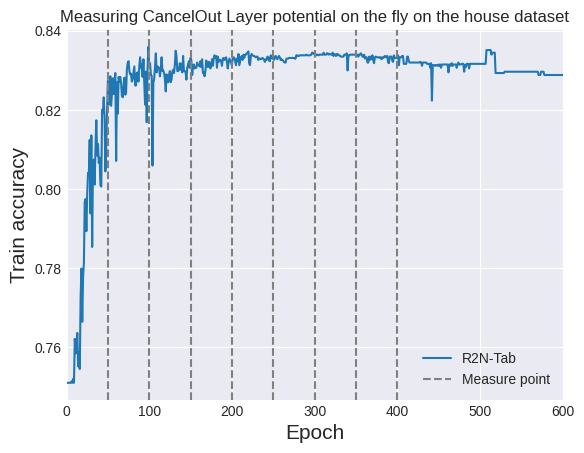

In [36]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Train accuracy", fontsize=15)
plt.plot(acc)
plt.axvline(x=50, c='grey', linestyle='dashed')
plt.axvline(x=100, c='grey', linestyle='dashed')
plt.axvline(x=150, c='grey', linestyle='dashed')
plt.axvline(x=200, c='grey', linestyle='dashed')
plt.axvline(x=250, c='grey', linestyle='dashed')
plt.axvline(x=300, c='grey', linestyle='dashed')
plt.axvline(x=350, c='grey', linestyle='dashed')
plt.axvline(x=400, c='grey', linestyle='dashed')
plt.xlim([0, 600])
plt.legend(['R2N-Tab', 'Measure point'])
plt.title("Measuring CancelOut Layer potential on the fly on the house dataset")
plt.savefig('CO-layer.pdf')

In [4]:
# Get accuracy and the rule net
accu = net.predict(X_test, Y_test)
rules = net.extract_rules(X_headers, print_rules=True)
print(f'Accuracy: {accu}, num rules: {len(rules)}, num conditions: {sum(map(len, rules))}')

Rulelist:
if [ P27p4<=0.039107299999999984 && P27p4<=0.047619 && not H2p2<=0.0306126 && not H13p1<=0.270492 ]:
  prediction = true
else if [ P1<=3392.0 && P6p2<=0.0013712000000000008 && P27p4<=0.047619 && H8p2<=0.0 && not H13p1<=0.1456992 ]:
  prediction = true
else if [ P1<=875.2000000000007 && not H13p1<=0.1456992 ]:
  prediction = true
else if [ not P14p9<=0.0535168 && P16p2<=0.785714 && P27p4<=0.039107299999999984 && P27p4<=0.047619 && H2p2<=0.21393460000000009 && not H18pA<=0.072727 ]:
  prediction = true
else if [ H2p2<=0.1491182 && H2p2<=0.21393460000000009 && not H10p1<=0.9981952000000001 && not H13p1<=0.1456992 ]:
  prediction = true
else if [ P1<=1345.5 && P1<=2089.7999999999993 && not P14p9<=0.0535168 && P27p4<=0.047619 && H2p2<=0.21393460000000009 ]:
  prediction = true
else if [ P1<=875.2000000000007 && P6p2<=0.003413 && P11p4<=0.19204449999999998 && not P14p9<=0.0535168 && P15p3<=0.012762799999999989 && not H18pA<=0.072727 ]:
  prediction = true
else if [ P1<=323.0 && P1<